# Import Libraries

In [1]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import matplotlib.image as mpimg
from os.path import split


%matplotlib inline

# Define Variables

In [3]:
path = "/home/jupyter/study/kaggle/plant_pathology/"
data_path = path +"data/"
output_path = path+"output/"
model_path = output_path+"models/"
img_path = data_path+"images/"

# Initial Analysis

In [4]:
img = plt.imread(img_path+"Train_30.jpg")
img.shape

(1365, 2048, 3)

In [99]:
### images sizes are 1365* 2048 so we are losing info at small size

# Reading Data

## Get Label DF

In [5]:
label_df = pd.read_csv(data_path+"train.csv")
label_df_lbe = pd.melt(label_df, id_vars = "image_id", value_vars=label_df.columns[1:])
label_df = label_df_lbe.loc[label_df_lbe.value == 1].drop("value", axis = 1).reset_index(drop = True)
label_df.set_index("image_id", inplace= True)

In [6]:
def get_label(file):
    img_name = split(file)[1]
    x = img_name.split(".")[0]
    return label_df.loc[x].values[0]

## Setup the data loader

In [102]:
data_path

'/home/jupyter/study/kaggle/plant_pathology/data/'

In [7]:
np.random.seed(42)
src = (ImageList.from_csv(path = data_path, csv_name = "train2.csv", folder = "train")
     .split_none()
     .label_from_func(get_label))

In [8]:
tfms = get_transforms(flip_vert=True, max_lighting=0.2, max_warp=0.1, max_zoom=1.02)

In [9]:
#data = (src.transform(tfms = tfms,  size=128).databunch().normalize(imagenet_stats))
data = (src.transform(tfms = tfms,  size=384).databunch().normalize(imagenet_stats))

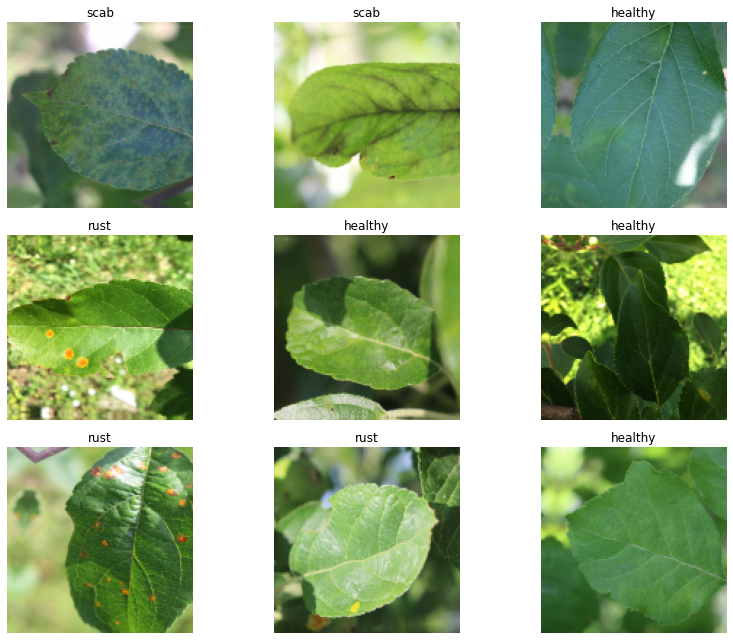

In [84]:
data.show_batch(rows=3, figsize=(12,9))

# Defining Model

In [10]:
arch = models.resnet50

In [11]:
learn = cnn_learner(data, arch, metrics=[error_rate])

In [12]:
learn.model_dir = '/home/jupyter/study/kaggle/plant_pathology/output/models/'

# Training Model

## Round 1

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.79E-04
Min loss divided by 10: 1.45E-02


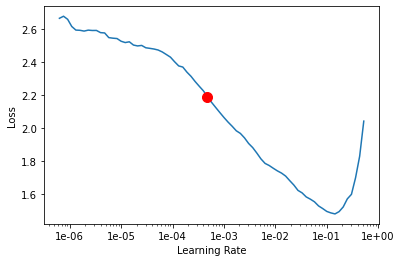

In [25]:
learn.lr_find()
learn.recorder.plot(suggestion = True)

In [118]:
model_path

'/home/jupyter/study/kaggle/plant_pathology/output/models/'

In [119]:
learn.model_dir = model_path

In [29]:
lr = 3e-4
learn.fit_one_cycle(15, slice(lr))

In [30]:
learn.save('stage-1-rn50')

## Round 2

In [38]:
learn.load('stage-1-rn50')

Learner(data=ImageDataBunch;

Train: LabelList (1821 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
scab,multiple_diseases,healthy,rust,healthy
Path: /home/jupyter/study/kaggle/plant_pathology/data;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /home/jupyter/study/kaggle/plant_pathology/data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size

In [32]:
data.batch_size = 256

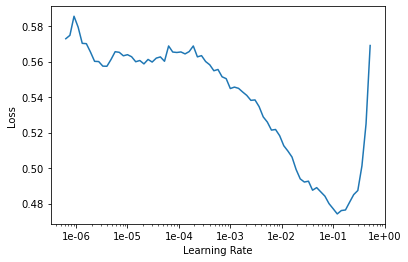

In [36]:
learn.lr_find()
learn.recorder.plot()

In [34]:
learn.recorder.plot()

RuntimeError: Error(s) in loading state_dict for Sequential:
	Missing key(s) in state_dict: "0.4.0.conv3.weight", "0.4.0.bn3.weight", "0.4.0.bn3.bias", "0.4.0.bn3.running_mean", "0.4.0.bn3.running_var", "0.4.0.downsample.0.weight", "0.4.0.downsample.1.weight", "0.4.0.downsample.1.bias", "0.4.0.downsample.1.running_mean", "0.4.0.downsample.1.running_var", "0.4.1.conv3.weight", "0.4.1.bn3.weight", "0.4.1.bn3.bias", "0.4.1.bn3.running_mean", "0.4.1.bn3.running_var", "0.4.2.conv3.weight", "0.4.2.bn3.weight", "0.4.2.bn3.bias", "0.4.2.bn3.running_mean", "0.4.2.bn3.running_var", "0.5.0.conv3.weight", "0.5.0.bn3.weight", "0.5.0.bn3.bias", "0.5.0.bn3.running_mean", "0.5.0.bn3.running_var", "0.5.1.conv3.weight", "0.5.1.bn3.weight", "0.5.1.bn3.bias", "0.5.1.bn3.running_mean", "0.5.1.bn3.running_var", "0.5.2.conv3.weight", "0.5.2.bn3.weight", "0.5.2.bn3.bias", "0.5.2.bn3.running_mean", "0.5.2.bn3.running_var", "0.5.3.conv3.weight", "0.5.3.bn3.weight", "0.5.3.bn3.bias", "0.5.3.bn3.running_mean", "0.5.3.bn3.running_var", "0.6.0.conv3.weight", "0.6.0.bn3.weight", "0.6.0.bn3.bias", "0.6.0.bn3.running_mean", "0.6.0.bn3.running_var", "0.6.1.conv3.weight", "0.6.1.bn3.weight", "0.6.1.bn3.bias", "0.6.1.bn3.running_mean", "0.6.1.bn3.running_var", "0.6.2.conv3.weight", "0.6.2.bn3.weight", "0.6.2.bn3.bias", "0.6.2.bn3.running_mean", "0.6.2.bn3.running_var", "0.6.3.conv3.weight", "0.6.3.bn3.weight", "0.6.3.bn3.bias", "0.6.3.bn3.running_mean", "0.6.3.bn3.running_var", "0.6.4.conv3.weight", "0.6.4.bn3.weight", "0.6.4.bn3.bias", "0.6.4.bn3.running_mean", "0.6.4.bn3.running_var", "0.6.5.conv3.weight", "0.6.5.bn3.weight", "0.6.5.bn3.bias", "0.6.5.bn3.running_mean", "0.6.5.bn3.running_var", "0.7.0.conv3.weight", "0.7.0.bn3.weight", "0.7.0.bn3.bias", "0.7.0.bn3.running_mean", "0.7.0.bn3.running_var", "0.7.1.conv3.weight", "0.7.1.bn3.weight", "0.7.1.bn3.bias", "0.7.1.bn3.running_mean", "0.7.1.bn3.running_var", "0.7.2.conv3.weight", "0.7.2.bn3.weight", "0.7.2.bn3.bias", "0.7.2.bn3.running_mean", "0.7.2.bn3.running_var". 
	size mismatch for 0.4.0.conv1.weight: copying a param with shape torch.Size([64, 64, 3, 3]) from checkpoint, the shape in current model is torch.Size([64, 64, 1, 1]).
	size mismatch for 0.4.1.conv1.weight: copying a param with shape torch.Size([64, 64, 3, 3]) from checkpoint, the shape in current model is torch.Size([64, 256, 1, 1]).
	size mismatch for 0.4.2.conv1.weight: copying a param with shape torch.Size([64, 64, 3, 3]) from checkpoint, the shape in current model is torch.Size([64, 256, 1, 1]).
	size mismatch for 0.5.0.conv1.weight: copying a param with shape torch.Size([128, 64, 3, 3]) from checkpoint, the shape in current model is torch.Size([128, 256, 1, 1]).
	size mismatch for 0.5.0.downsample.0.weight: copying a param with shape torch.Size([128, 64, 1, 1]) from checkpoint, the shape in current model is torch.Size([512, 256, 1, 1]).
	size mismatch for 0.5.0.downsample.1.weight: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for 0.5.0.downsample.1.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for 0.5.0.downsample.1.running_mean: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for 0.5.0.downsample.1.running_var: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for 0.5.1.conv1.weight: copying a param with shape torch.Size([128, 128, 3, 3]) from checkpoint, the shape in current model is torch.Size([128, 512, 1, 1]).
	size mismatch for 0.5.2.conv1.weight: copying a param with shape torch.Size([128, 128, 3, 3]) from checkpoint, the shape in current model is torch.Size([128, 512, 1, 1]).
	size mismatch for 0.5.3.conv1.weight: copying a param with shape torch.Size([128, 128, 3, 3]) from checkpoint, the shape in current model is torch.Size([128, 512, 1, 1]).
	size mismatch for 0.6.0.conv1.weight: copying a param with shape torch.Size([256, 128, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 512, 1, 1]).
	size mismatch for 0.6.0.downsample.0.weight: copying a param with shape torch.Size([256, 128, 1, 1]) from checkpoint, the shape in current model is torch.Size([1024, 512, 1, 1]).
	size mismatch for 0.6.0.downsample.1.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for 0.6.0.downsample.1.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for 0.6.0.downsample.1.running_mean: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for 0.6.0.downsample.1.running_var: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for 0.6.1.conv1.weight: copying a param with shape torch.Size([256, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 1024, 1, 1]).
	size mismatch for 0.6.2.conv1.weight: copying a param with shape torch.Size([256, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 1024, 1, 1]).
	size mismatch for 0.6.3.conv1.weight: copying a param with shape torch.Size([256, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 1024, 1, 1]).
	size mismatch for 0.6.4.conv1.weight: copying a param with shape torch.Size([256, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 1024, 1, 1]).
	size mismatch for 0.6.5.conv1.weight: copying a param with shape torch.Size([256, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([256, 1024, 1, 1]).
	size mismatch for 0.7.0.conv1.weight: copying a param with shape torch.Size([512, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([512, 1024, 1, 1]).
	size mismatch for 0.7.0.downsample.0.weight: copying a param with shape torch.Size([512, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([2048, 1024, 1, 1]).
	size mismatch for 0.7.0.downsample.1.weight: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([2048]).
	size mismatch for 0.7.0.downsample.1.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([2048]).
	size mismatch for 0.7.0.downsample.1.running_mean: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([2048]).
	size mismatch for 0.7.0.downsample.1.running_var: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([2048]).
	size mismatch for 0.7.1.conv1.weight: copying a param with shape torch.Size([512, 512, 3, 3]) from checkpoint, the shape in current model is torch.Size([512, 2048, 1, 1]).
	size mismatch for 0.7.2.conv1.weight: copying a param with shape torch.Size([512, 512, 3, 3]) from checkpoint, the shape in current model is torch.Size([512, 2048, 1, 1]).
	size mismatch for 1.2.weight: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([4096]).
	size mismatch for 1.2.bias: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([4096]).
	size mismatch for 1.2.running_mean: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([4096]).
	size mismatch for 1.2.running_var: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([4096]).
	size mismatch for 1.4.weight: copying a param with shape torch.Size([512, 1024]) from checkpoint, the shape in current model is torch.Size([512, 4096]).

In [39]:
lr = 1e-2
learn.fit_one_cycle(15, slice(1e-2, 1e-4))

In [41]:
learn.save('stage-2-rn50')

## Stage 3

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


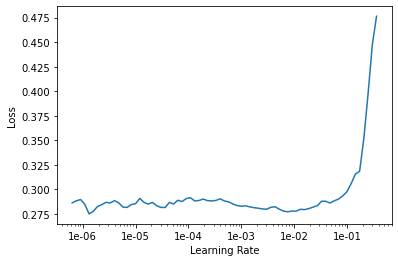

In [42]:
learn.lr_find()
learn.recorder.plot()

In [43]:
lr = 5e-4
learn.fit_one_cycle(5, slice(lr, 5e-6))

In [62]:
learn.save('stage-3-rn50')

## Stage 4

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/multiprocessing/queues.py", line 232, in _feed
    close()
  File "/opt/conda/lib/python3.7/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/opt/conda/lib/python3.7/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/opt/conda/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.7/multiprocessing/queues.py", line 263, in _feed
    queue_sem.release()
ValueError: semaphore or lock released too many times

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/multipro

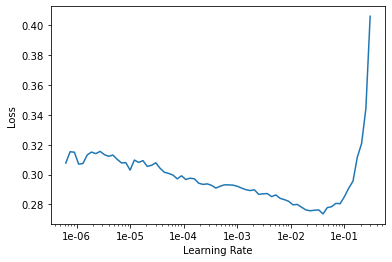

In [64]:
learn.lr_find()
learn.recorder.plot()

In [67]:
learn.load('stage-3-rn50')

Learner(data=ImageDataBunch;

Train: LabelList (1821 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
scab,multiple_diseases,healthy,rust,healthy
Path: /home/jupyter/study/kaggle/plant_pathology/data;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /home/jupyter/study/kaggle/plant_pathology/data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


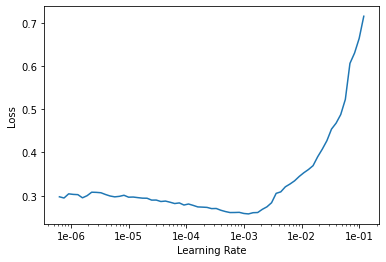

In [68]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [69]:
lr = 1e-4
learn.fit_one_cycle(5, slice(lr,1e-6, 5e-6))

In [71]:
lr = 1e-4
learn.fit_one_cycle(3, slice(lr,1e-6, 5e-6))

In [72]:
lr = 1e-4
learn.fit_one_cycle(5, slice(lr,1e-6, 5e-6))

In [73]:
learn.save('stage-4-rn50')

In [74]:
lr = 1e-4
learn.fit_one_cycle(10, slice(lr,1e-6, 5e-6))

In [78]:
learn.save('stage-4-rn50')

## Stage 5

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


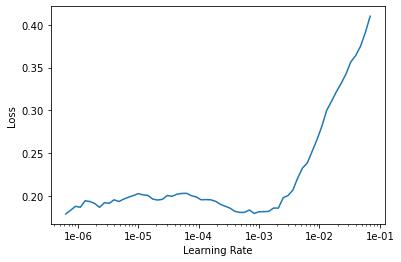

In [80]:
learn.lr_find()
learn.recorder.plot()

In [81]:
lr = 1e-4
learn.fit_one_cycle(5, slice(lr, 1e-5))

In [83]:
lr = 1e-4
learn.fit_one_cycle(5, slice(lr, 1e-5))

In [ ]:
learn.save('stage-5-rn50')

## Stage 6

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


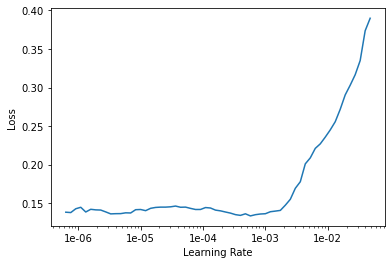

In [87]:
learn.lr_find()
learn.recorder.plot()

In [88]:
lr = 1e-4
learn.fit_one_cycle(5, slice(lr, 1e-5))

In [89]:
learn.save('stage-6-rn50')

In [90]:
lr = 1e-4
learn.fit_one_cycle(5, slice(lr, 1e-5))

In [92]:
learn.save('stage-6-rn50')

In [93]:
lr = 1e-4
learn.fit_one_cycle(5, slice(lr, 1e-5))

In [94]:
learn.save('stage-6-rn50')

## Stage 7

In [106]:
lr = 1e-4
learn.fit_one_cycle(5, slice(lr, 1e-5))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


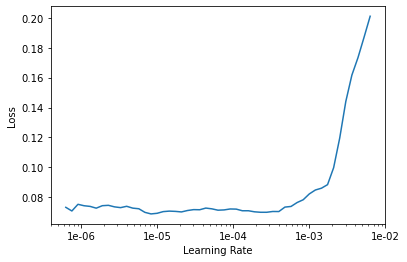

In [101]:
learn.lr_find()
learn.recorder.plot()

In [107]:
lr = 1e-6
learn.fit_one_cycle(5, slice(lr, lr/10))

In [108]:
learn.save('stage-7-rn50')

# Training with images size 256

In [ ]:
## Loss from last step 0.073501

## Stage 1

In [11]:
data = (src.transform(tfms = tfms,  size = 256).databunch().normalize(imagenet_stats))

In [12]:
learn.data = data

In [143]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (1821 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
scab,multiple_diseases,healthy,rust,healthy
Path: /home/jupyter/study/kaggle/plant_pathology/data;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /home/jupyter/study/kaggle/plant_pathology/data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size

In [144]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


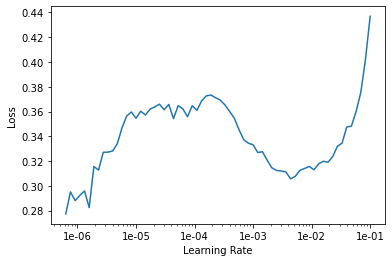

In [145]:
learn.lr_find()
learn.recorder.plot()

In [146]:
lr = 1e-3
learn.fit_one_cycle(15, slice(lr, lr/10))

In [147]:
learn.save("stage-1-rn50-256")

In [148]:
lr = 1e-3
learn.fit_one_cycle(10, slice(lr, lr/10))

In [ ]:
learn.save("stage-1-rn50-256")

## Stage 2

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


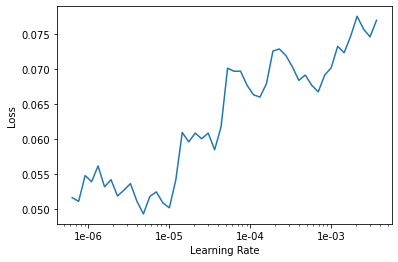

In [149]:
learn.lr_find()
learn.recorder.plot()

In [150]:
lr = 1e-6
learn.fit_one_cycle(10, slice(lr, lr/10))

In [151]:
learn.save("stage-2-rn50-256")

## Stage 3

In [17]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


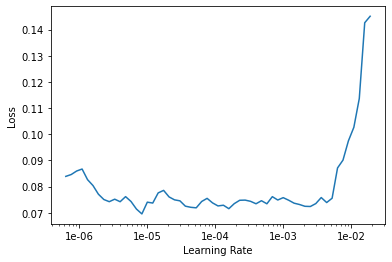

In [18]:
learn.lr_find()
learn.recorder.plot()

In [26]:
lr = 5e-6
learn.fit_one_cycle(1, slice(lr, lr/5))

In [27]:
learn.save("stage-3-rn50-256")

## Unfreeze Stage 1

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f2a9d1d9b00>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 140, in join
    res = self._popen.wait(timeout)
  File "/opt/conda/lib/python3.7/multiprocessing/popen_fork.py", line 48, in wait
    return self.poll(os.WNOHANG if timeout == 0.0 else 0)
  File "/opt/conda/lib/python3.7/multiprocessing/popen_fork.py", line 28, in poll
    pid, sts = os.waitpid(self.pid, flag)
KeyboardInterrupt: 


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


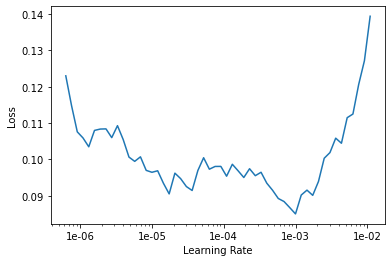

In [37]:
learn.lr_find()
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


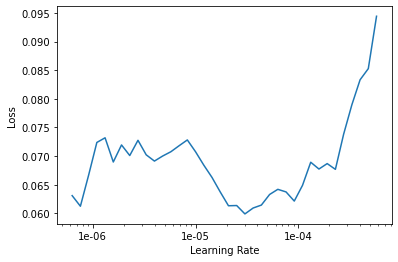

In [40]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [45]:
lr = 7e-5
learn.fit_one_cycle(5, slice(lr, lr/5))

In [46]:
lr = 7e-5
learn.fit_one_cycle(5, slice(lr, lr/5))

In [ ]:
learn.save("stage-4-rn50-256")

## Stage 5

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


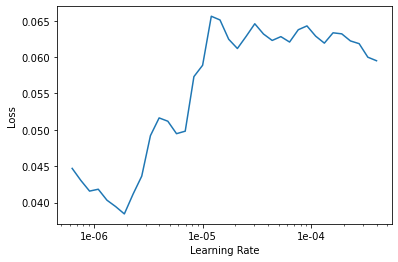

In [47]:
learn.lr_find()
learn.recorder.plot()

In [48]:
lr = 7e-5
learn.fit_one_cycle(10, slice(lr, lr/5))

In [49]:
learn.save("stage-5-rn50-256")

## Stage 6

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


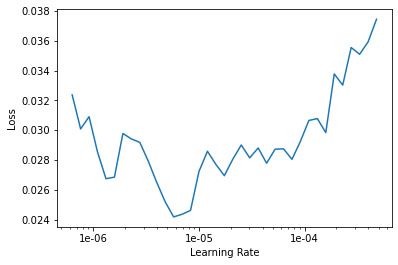

In [60]:
learn.lr_find()
learn.recorder.plot()

In [61]:
lr = 6e-6
learn.fit_one_cycle(10, slice(lr, lr/3))

In [62]:
learn.save("stage-6-rn50-256")

## Stage 7

In [17]:
data = (src.transform(tfms = tfms,  size = 256).databunch().normalize(imagenet_stats))
data.batch_size = 128
learn = cnn_learner(data, arch, metrics=[error_rate])
learn

Learner(data=ImageDataBunch;

Train: LabelList (1821 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
scab,multiple_diseases,healthy,rust,healthy
Path: /home/jupyter/study/kaggle/plant_pathology/data;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /home/jupyter/study/kaggle/plant_pathology/data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size

In [21]:
learn.load("stage-6-rn50-256")
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


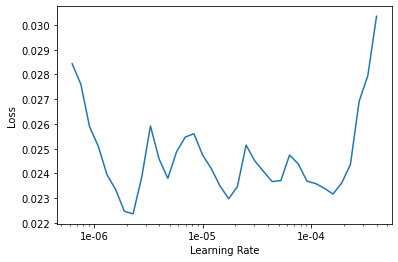

In [22]:
learn.lr_find()
learn.recorder.plot()

In [23]:
lr = 2e-6
learn.fit_one_cycle(10, slice(lr, lr/5))

In [24]:
learn.save("stage-7-rn50-256")

## Stage 8

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


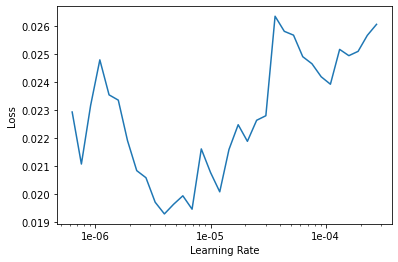

In [32]:
learn.lr_find()
learn.recorder.plot()

In [33]:
lr = 3e-6
learn.fit_one_cycle(10, slice(lr, lr/3))

In [34]:
learn.save("stage-8-rn50-256")

## stage 9

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


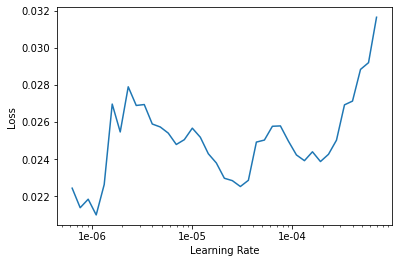

In [36]:
learn.lr_find()
learn.recorder.plot()

In [37]:
lr = 1e-5
learn.fit_one_cycle(5, slice(lr, lr/3))

In [38]:
learn.save("stage-8-rn50-256")

In [40]:
learn.load("stage-8-rn50-256")
lr = 1e-5
learn.fit_one_cycle(2, slice(lr, lr/3))

In [41]:
learn.save("stage-8-rn50-256")

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


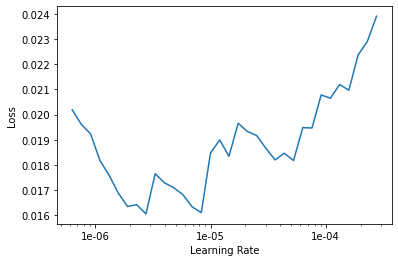

In [52]:
learn.lr_find()
learn.recorder.plot()

In [53]:
lr = 1e-6
learn.fit_one_cycle(2, slice(lr, lr/3))

In [54]:
learn.save("stage-8-rn50-256")


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


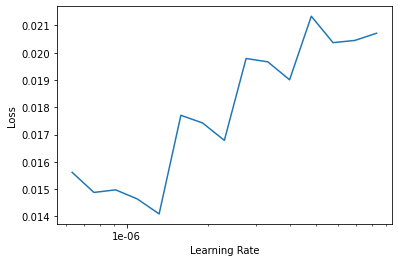

In [57]:
learn.load("stage-8-rn50-256")
learn.lr_find()
learn.recorder.plot()

In [58]:
lr = 1e-6
learn.fit_one_cycle(3, slice(lr, lr/3))

In [59]:
lr = 1e-6
learn.fit_one_cycle(3, slice(lr, lr/3))

In [61]:
learn.save("stage-9-rn50-256")

## Stage 10

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


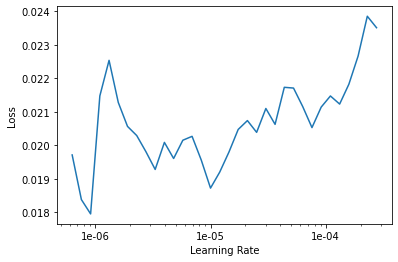

In [62]:
learn.lr_find()
learn.recorder.plot()

In [63]:
lr = 4e-6
learn.fit_one_cycle(3, slice(lr, lr/3))

In [65]:
# lr = 4e-6
# learn.fit_one_cycle(3, slice(lr, lr/3))

# Training With Images of Size 384

In [13]:
## Select Model from Last Step
learn.load("stage-9-rn50-256")

Learner(data=ImageDataBunch;

Train: LabelList (1821 items)
x: ImageList
Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384)
y: CategoryList
scab,multiple_diseases,healthy,rust,healthy
Path: /home/jupyter/study/kaggle/plant_pathology/data;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /home/jupyter/study/kaggle/plant_pathology/data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size

In [14]:
## Updating data loader
#data = (src.transform(tfms = tfms,  size = 384).databunch().normalize(imagenet_stats))
data.batch_size = 48
learn

Learner(data=ImageDataBunch;

Train: LabelList (1821 items)
x: ImageList
Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384)
y: CategoryList
scab,multiple_diseases,healthy,rust,healthy
Path: /home/jupyter/study/kaggle/plant_pathology/data;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /home/jupyter/study/kaggle/plant_pathology/data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size

In [19]:
## Freezing Model
learn.freeze()

In [ ]:
### Try and Freeze everything except last layer

In [25]:
### Freeze All Layers
for layer in learn.layer_groups[2]:
    for param in layer.parameters():
        param.requires_grad = False
        
for layer in learn.layer_groups[1]:
    for param in layer.parameters():
        param.requires_grad = False
        
for layer in learn.layer_groups[0]:
    for param in layer.parameters():
        param.requires_grad = False

In [33]:
for param in learn.layer_groups[-1][-1].parameters():
    param.requires_grad = True

In [40]:
learn.layer_groups[-1]

Sequential(
  (0): AdaptiveAvgPool2d(output_size=1)
  (1): AdaptiveMaxPool2d(output_size=1)
  (2): Flatten()
  (3): BatchNorm1d(4096, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (4): Dropout(p=0.25, inplace=False)
  (5): Linear(in_features=4096, out_features=512, bias=True)
  (6): ReLU(inplace=True)
  (7): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): Dropout(p=0.5, inplace=False)
  (9): Linear(in_features=512, out_features=4, bias=True)
)

In [41]:
for param in learn.layer_groups[-1][-3].parameters():
    param.requires_grad = True
    
for param in learn.layer_groups[-1][-5].parameters():
    param.requires_grad = True
    
for param in learn.layer_groups[-1][-7].parameters():
    param.requires_grad = True

In [44]:
learn.freeze()

## Stage 1

In [ ]:
learn.lr_find(stop_div = True)
learn.recorder.plot(suggestion= True)

In [17]:
lr = 5e-6
learn.fit_one_cycle(15, lr)

KeyboardInterrupt: 

In [33]:
learn.save("stage-1-rn50-384")

## Stage 2

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


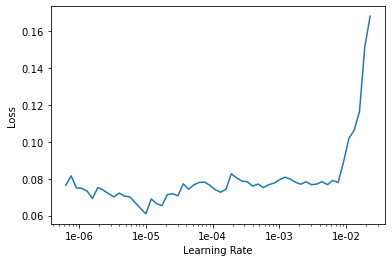

In [40]:
learn.lr_find(stop_div = True)
learn.recorder.plot(suggestion= False)

In [48]:
learn.load("stage-1-rn50-384")

Learner(data=ImageDataBunch;

Train: LabelList (1821 items)
x: ImageList
Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384)
y: CategoryList
scab,multiple_diseases,healthy,rust,healthy
Path: /home/jupyter/study/kaggle/plant_pathology/data;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /home/jupyter/study/kaggle/plant_pathology/data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size

In [49]:
lr = 1e-6
learn.fit_one_cycle(1, lr)

In [51]:
lr = 1e-6
learn.fit_one_cycle(1, lr)

In [52]:
lr = 1e-6
learn.fit_one_cycle(1, lr)

In [53]:
learn.save("stage-2-rn50-384")

In [ ]:
learn.load("stage-2-rn50-384")

## Stage 3

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


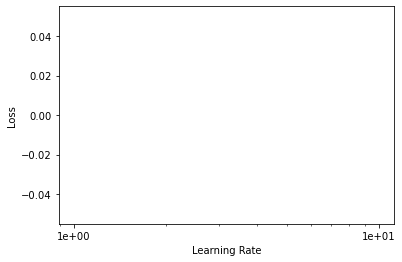

In [54]:
learn.lr_find(stop_div = True)
learn.recorder.plot(suggestion= False)

In [58]:
lr = 1e-7
learn.fit_one_cycle(1, lr)

In [81]:
print(param.)

None


## Stage Scratch Work

In [55]:
[x for x in zip(learn.recorder.losses, learn.recorder.lrs)]

[(tensor(0.0080), 1e-07), (tensor(0.0735), 1.202264434617413e-07)]

# Submitting results

## Setting up the data loader

In [12]:
learn.model_dir = '/home/jupyter/study/kaggle/plant_pathology/output/models/'

In [44]:
#learn.load('stage-4-rn50')
learn.load('stage-8-rn50-256')

Learner(data=ImageDataBunch;

Train: LabelList (1821 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
scab,multiple_diseases,healthy,rust,healthy
Path: /home/jupyter/study/kaggle/plant_pathology/data;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /home/jupyter/study/kaggle/plant_pathology/data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size

In [45]:
test_df = pd.read_csv(data_path+"test.csv")

In [46]:
test_images = ImageList.from_folder(img_path)

In [47]:
test_images.filter_by_func(lambda x: x.name.startswith("Test"))

ImageList (1821 items)
Image (3, 1365, 2048),Image (3, 1365, 2048),Image (3, 1365, 2048),Image (3, 1365, 2048),Image (3, 1365, 2048)
Path: /home/jupyter/study/kaggle/plant_pathology/data/images

In [48]:
test_df['healthy'] = [0.0 for _ in test_df.index]
test_df['multiple_diseases'] = [0.0 for _ in test_df.index]
test_df['rust'] = [0.0 for _ in test_df.index]
test_df['scab'] = [0.0 for _ in test_df.index]
test_df = test_df.set_index('image_id')

## Making Predictions

In [49]:
from tqdm import tqdm_notebook as tqdm
for item in tqdm(test_images.items):
    name = item.name[:-4]
    img = open_image(item)
    preds = learn.predict(img)[2]

    test_df.loc[name]['healthy'] = preds[0]
    test_df.loc[name]['multiple_diseases'] = preds[1]
    test_df.loc[name]['rust'] = preds[2]
    test_df.loc[name]['scab'] = preds[3]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [50]:
test_df.to_csv(output_path+"result_res50.csv")

In [51]:
output_path

'/home/jupyter/study/kaggle/plant_pathology/output/'